In [1]:
# compares between different versions of the code
import os, sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "gtracr"))

from trajectory import Trajectory
from constants import EARTH_RADIUS

def convert_trajectory_to_cartesian(trajectory_dict):
    r_arr = np.array(trajectory_dict["r"]) / EARTH_RADIUS
    theta_arr = np.array(trajectory_dict["theta"])
    phi_arr = np.array(trajectory_dict["phi"])
    
    x_arr = r_arr * np.sin(theta_arr) * np.cos(phi_arr)
    y_arr = r_arr * np.sin(theta_arr) * np.sin(phi_arr)
    z_arr = r_arr * np.cos(theta_arr)
    
    return x_arr, y_arr, z_arr

def magnitude(x_arr, y_arr, z_arr):
    return np.sqrt(x_arr**2. + y_arr**2. + z_arr**2.)

In [2]:
# %load_ext snakeviz

In [4]:
traj1 = Trajectory(
        "p+",
        latitude=0.,
        longitude=0.,
        detector_altitude=100.,
        zenith_angle=0.,
        azimuth_angle=0.,
        particle_altitude=100.,
        rigidity=40.,
        bfield_type="dipole"
    )

traj2 = Trajectory(
        "p+",
        latitude=0.,
        longitude=0.,
        detector_altitude=100.,
        zenith_angle=0.,
        azimuth_angle=0.,
        particle_altitude=100.,
        rigidity=40.,
        bfield_type="dipole"
    )


# result = traj.get_trajectory(max_step=1000000, step_size=1e-6, get_data=True)
trajdata1 = traj1.get_trajectory(dt=1e-5, max_time=0.05, max_step=10000, get_data=True, use_python=True)  # 1000 iterations with dt=1e-5, max_time=0.05s

trajdata2 = traj2.get_trajectory(dt=1e-5, max_time=0.05, max_step=10000, get_data=True)  # 1000 iterations with dt=1e-5, max_time=0.05s

In [9]:
t_arr1 = trajdata1["t"]
x_arr1, y_arr1, z_arr1 = convert_trajectory_to_cartesian(trajdata1)
mag_arr1 = magnitude(x_arr1, y_arr1, z_arr1)

t_arr2 = trajdata2["t"]
x_arr2, y_arr2, z_arr2 = convert_trajectory_to_cartesian(trajdata2)
mag_arr2 = magnitude(x_arr2, y_arr2, z_arr2)

Text(0.5, 1.0, 'Trajectory between two versions of the code')

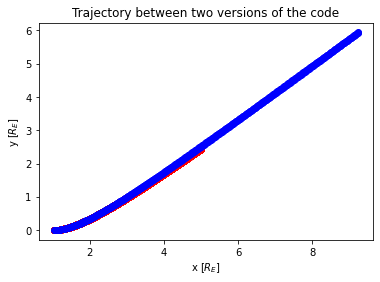

In [15]:
# compare between the magnitudes of both versions vs time
fig, ax = plt.subplots()
ax.scatter(x_arr1, y_arr1, c="r")
ax.scatter(x_arr2, y_arr2, c="b")
ax.set_xlabel(r"x [$R_E$]")
ax.set_ylabel(r"y [$R_E$]")
ax.set_title("Trajectory between two versions of the code")

Text(0.5, 1.0, 'Trajectory between two versions of the code')

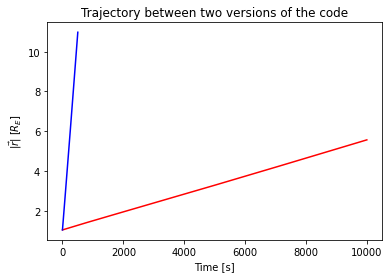

In [14]:
# use time array that is larger
# t_arr = t_arr1 if len(t_arr1) > len(t_arr2) else t_arr2
# compare between the magnitudes of both versions vs time
fig, ax = plt.subplots()
ax.plot(t_arr1, mag_arr1, color="r")
ax.plot(t_arr2, mag_arr2, color="b")
ax.set_xlabel("Time [s]")
ax.set_ylabel(r"$\| \vec{r} \|$ [$R_E$]")
ax.set_title("Trajectory between two versions of the code")